In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import htfa_torch.htfa as HTFA

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/dataset/util.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import OrderedDict, Sequence
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [3]:
from scipy.spatial import distance
from scipy import stats
import nilearn.plotting as niplot
import statsmodels.stats.multitest as smt
from ordered_set import OrderedSet
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline

In [4]:
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import cycler
from seaborn.apionly import color_palette
column_width = 3.3
page_width = 6.7
# colorblind-friendly colors 
# source: https://personal.sron.nl/~pault/
colors = {
    'bright': ['4477AA', 
               '66CCEE', 
               '228833', 
               'CCBB44', 
               'EE6677', 
               'AA3377', 
               'BBBBBB'],
    'high_contrast': ['FFFFFF', 
                      'DDAA33', 
                      'BB5566', 
                      '004488', 
                      '00000'],
    'vibrant': ['0077BB', 
                '33BBEE', 
                '0099BB',
                'EE7733',
                'CC3311',
                'EE3377',
                'BBBBBB'],
    'muted': ['332288',
              '88CCEE',
              '44AA99',
              '117733',
              '999933',
              'DDCC77',
              'CC6677',
              '882255',
              'AA4499']
}
pl.rc('legend', frameon=False)
pl.rc('figure', figsize=(column_width, 
                         0.66 * column_width),
                dpi=120)
pl.rc('savefig', dpi=300)
pl.rc('font', size=8)


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [5]:
%matplotlib inline

In [6]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [7]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest.db')

In [8]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

01/31/2020 17:38:20 Loading Nifti image /data/zulqarnain/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/31/2020 17:38:23 Loading Nifti image /data/zulqarnain/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join

01/31/2020 17:38:47 Loading Nifti image /data/zulqarnain/Haxby_Final/sub2_run05_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/31/2020 17:38:49 Loading Nifti image /data/zulqarnain/Haxby_Final/sub2_run06_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join

01/31/2020 17:39:13 Loading Nifti image /data/zulqarnain/Haxby_Final/sub3_run08_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/31/2020 17:39:15 Loading Nifti image /data/zulqarnain/Haxby_Final/sub3_run09_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join

01/31/2020 17:39:39 Loading Nifti image /data/zulqarnain/Haxby_Final/sub4_run11_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/31/2020 17:39:41 Loading Nifti image /data/zulqarnain/Haxby_Final/sub4_run12_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join

01/31/2020 17:40:05 Loading Nifti image /data/zulqarnain/Haxby_Final/sub6_run04_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/31/2020 17:40:07 Loading Nifti image /data/zulqarnain/Haxby_Final/sub6_run05_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join

In [9]:
dtfa.load_state('data/haxby_norest_k100_n1000_01242020_204921') 

In [10]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in haxby_db.all() if 'rest' not in b.task],
                                                  mask='/data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100)

01/31/2020 17:40:53 Loading Nifti image /data/zulqarnain/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/31/2020 17:40:55 Loading Nifti image /data/zulqarnain/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join

01/31/2020 17:41:16 Loading Nifti image /data/zulqarnain/Haxby_Final/sub2_run05_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/31/2020 17:41:17 Loading Nifti image /data/zulqarnain/Haxby_Final/sub2_run06_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join

01/31/2020 17:41:39 Loading Nifti image /data/zulqarnain/Haxby_Final/sub3_run08_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/31/2020 17:41:41 Loading Nifti image /data/zulqarnain/Haxby_Final/sub3_run09_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join

01/31/2020 17:42:05 Loading Nifti image /data/zulqarnain/Haxby_Final/sub4_run11_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/31/2020 17:42:06 Loading Nifti image /data/zulqarnain/Haxby_Final/sub4_run12_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join

01/31/2020 17:42:30 Loading Nifti image /data/zulqarnain/Haxby_Final/sub6_run04_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/31/2020 17:42:32 Loading Nifti image /data/zulqarnain/Haxby_Final/sub6_run05_mc_MNI_masked.nii.gz with mask /data/zulqarnain/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join

In [11]:
htfa.load_state('data/haxby_norest_k100_n1500_01252020_003420')

In [12]:
validation_filter = haxby_db.inference_filter(training=False)
validation_blocks = [b for (b, block) in enumerate(dtfa._blocks) if validation_filter(block)]

In [13]:
def task_labeler(task):
    return task

def block_task_labeler(b):
    return b.task


In [14]:
def subject_labeler(subject):
    return subject

def block_subject_labeler(block):
    return 'Subject %d' % block.subject

In [24]:
def classification_pipeline(data,targets,session_labels,scoring="roc_auc",cv=LeaveOneGroupOut(),input_data=False,print_all=True):
    categories = np.unique(targets)
    overall_result = []
    overall_result_chance = []
    feature_selection = SelectPercentile(f_classif, percentile=5)
    category_result = {key:None for key in categories}
    for category in categories:
        print("Processing %s" % (category))
        svc = SVC(C=1., kernel="linear")
        if input_data:
            classifier = Pipeline([('anova', feature_selection), ('svc', svc)])
        else:
            classifier = svc
        dummy_classifier = DummyClassifier()

        classification_target = [t==category for t in targets]
        result = cross_val_score(
            classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
            scoring="roc_auc",
        )

        result_chance = cross_val_score(
            dummy_classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
            scoring="roc_auc",
        )
        
        category_result[category] = result
        overall_result.extend(result)
        overall_result_chance.extend(result_chance)
        if print_all:
            print("Scores: %1.4f +- %1.4f" % (
                result.mean(),
                result.std()))

            print("Chance Scores: %1.4f +- %1.4f" % (
                result_chance.mean(),
                result_chance.std()))
    
    if print_all:
        print ('...')
        print("Overall Score: %1.4f +- %1.4f" % (
        np.array(overall_result).mean(),
        np.array(overall_result).std()))

        print("Overall Dummy Score: %1.4f +- %1.4f" % (
        np.array(overall_result_chance).mean(),
        np.array(overall_result_chance).std()))

        print ("\n")
    return overall_result,overall_result_chance,category_result

In [25]:
dtfa_hyperparams = dtfa.variational.hyperparams.state_vardict()
all_weights_dtfa = dtfa_hyperparams['weights']['mu'].data.numpy()
all_weights_htfa = htfa.enc.hyperparams.block__weights__mu.data.numpy()
confidence = 0.95

In [26]:
### task classification using leave one out runs on NTFA###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,session_labels=session_labels,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in dtfa.tasks()}
for c in dtfa.tasks():
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject 1
Processing bottle
Scores: 0.8701 +- 0.2150
Chance Scores: 0.5519 +- 0.1999
Processing cat
Scores: 0.8831 +- 0.1591
Chance Scores: 0.4935 +- 0.1506
Processing chair
Scores: 0.8701 +- 0.2150
Chance Scores: 0.6169 +- 0.2285
Processing face
Scores: 0.9870 +- 0.0411
Chance Scores: 0.4740 +- 0.1561
Processing house
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4740 +- 0.1591
Processing scissors
Scores: 0.8831 +- 0.1909
Chance Scores: 0.5519 +- 0.1976
Processing scrambledpix
Scores: 0.9870 +- 0.0411
Chance Scores: 0.4026 +- 0.0821
Processing shoe
Scores: 0.8831 +- 0.2181
Chance Scores: 0.4286 +- 0.0305
...
Overall Score: 0.9205 +- 0.1694
Overall Dummy Score: 0.4992 +- 0.1755


Processing Subject 2
Processing bottle
Scores: 0.7778 +- 0.2750
Chance Scores: 0.5278 +- 0.2134
Processing cat
Scores: 0.9444 +- 0.1242
Chance Scores: 0.5208 +- 0.1928
Processing chair
Scores: 0.8472 +- 0.1729
Chance Scores: 0.5208 +- 0.1279
Processing face
Scores: 0.9861 +- 0.0461
Chance Scores: 0.5069

In [27]:
### task classification using leave one out runs on HTFA###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in subjects:
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_task_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,session_labels=session_labels,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in dtfa.tasks()}
for c in dtfa.tasks():
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject 1
Processing bottle
Scores: 0.6234 +- 0.3296
Chance Scores: 0.5909 +- 0.2400
Processing cat
Scores: 0.8442 +- 0.1663
Chance Scores: 0.5519 +- 0.1976
Processing chair
Scores: 0.8831 +- 0.1469
Chance Scores: 0.4870 +- 0.2545
Processing face
Scores: 0.9610 +- 0.0636
Chance Scores: 0.5260 +- 0.2027
Processing house
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5065 +- 0.2076
Processing scissors
Scores: 0.5584 +- 0.3416
Chance Scores: 0.5260 +- 0.1957
Processing scrambledpix
Scores: 0.8052 +- 0.2134
Chance Scores: 0.5195 +- 0.1999
Processing shoe
Scores: 0.9091 +- 0.1102
Chance Scores: 0.4286 +- 0.0528
...
Overall Score: 0.8231 +- 0.2521
Overall Dummy Score: 0.5170 +- 0.2068


Processing Subject 2
Processing bottle
Scores: 0.7083 +- 0.3796
Chance Scores: 0.6111 +- 0.2485
Processing cat
Scores: 0.6806 +- 0.2843
Chance Scores: 0.5278 +- 0.2461
Processing chair
Scores: 0.8750 +- 0.0992
Chance Scores: 0.4306 +- 0.1889
Processing face
Scores: 0.9028 +- 0.1265
Chance Scores: 0.5625

In [28]:
### task classification using leave one out runs on input data###
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []

for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._blocks[i]
        if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,session_labels=session_labels,
                                                                   scoring="roc_auc",
                                                                   input_data = True,
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in dtfa.tasks()}
for c in dtfa.tasks():
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject 1
Processing bottle
Scores: 0.9221 +- 0.1411
Chance Scores: 0.4286 +- 0.0861
Processing cat
Scores: 0.9870 +- 0.0411
Chance Scores: 0.5000 +- 0.1429
Processing chair
Scores: 0.8961 +- 0.2029
Chance Scores: 0.4221 +- 0.0367
Processing face
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5130 +- 0.2234
Processing house
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4416 +- 0.0669
Processing scissors
Scores: 0.9610 +- 0.0881
Chance Scores: 0.5974 +- 0.2223
Processing scrambledpix
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4026 +- 0.0551
Processing shoe
Scores: 0.9870 +- 0.0411
Chance Scores: 0.5390 +- 0.1935
...
Overall Score: 0.9692 +- 0.1020
Overall Dummy Score: 0.4805 +- 0.1603


Processing Subject 2
Processing bottle
Scores: 0.9167 +- 0.1076
Chance Scores: 0.5000 +- 0.1667
Processing cat
Scores: 0.9861 +- 0.0461
Chance Scores: 0.5000 +- 0.1596
Processing chair
Scores: 0.9306 +- 0.0822
Chance Scores: 0.5069 +- 0.1783
Processing face
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5556

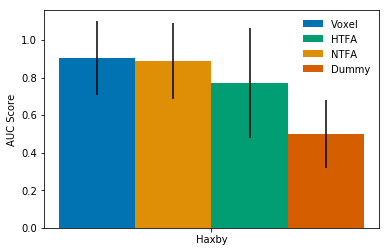

In [20]:
voxel_accuracies = np.mean(voxel_summary_result)
voxel_errs = np.std(voxel_summary_result)
htfa_accuracies = np.mean(htfa_summary_result)
htfa_errs = np.std(htfa_summary_result)
ntfa_accuracies = np.mean(ntfa_summary_result)
ntfa_errs = np.std(ntfa_summary_result)
dummy_accuracies = np.mean(dummy_summary_result)
dummy_errs = np.std(dummy_summary_result)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.ylabel('AUC Score')
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylim(bottom=0,)
fig.savefig('haxby_svm_accuracies.pdf')

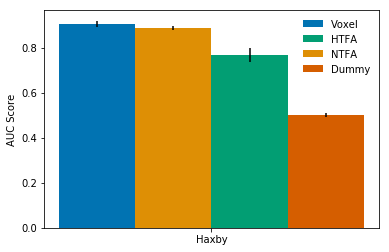

In [21]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) #* stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) #* stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result) #* stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_result)# * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_se.pdf')

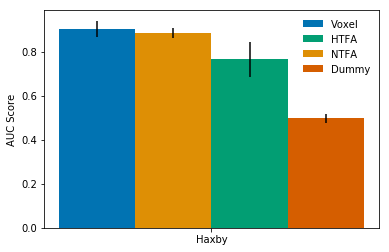

In [22]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_result) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [23]:
stats.ttest_ind(ntfa_summary_means,dummy_summary_means)

Ttest_indResult(statistic=26.12417863548476, pvalue=1.554952041676225e-10)

In [29]:
dtfa.tasks()

OrderedSet(['scissors', 'face', 'cat', 'shoe', 'house', 'scrambledpix', 'bottle', 'chair'])

In [32]:
from scipy.stats import pearsonr
from scipy.special import betainc
def corrcoef(matrix):
    r = np.corrcoef(matrix)
    rf = r[np.triu_indices(r.shape[0], 1)]
    df = matrix.shape[1] - 2
    ts = rf * rf * (df / (1 - rf * rf))
    pf = betainc(0.5 * df, 0.5, df / (df + ts))
    p = np.zeros(shape=r.shape)
    p[np.triu_indices(p.shape[0], 1)] = pf
    p[np.tril_indices(p.shape[0], -1)] = p.T[np.tril_indices(p.shape[0], -1)]
    p[np.diag_indices(p.shape[0])] = np.ones(p.shape[0])
    return r, p


In [50]:
### functional connectivity using NTFA ###

all_factor_centers = dtfa_hyperparams['factor_centers']['mu'].data.numpy()
all_factor_widths = np.exp(dtfa_hyperparams['factor_log_widths']['mu'].data.numpy())

scissors_matrix = []
face_matrix = []
cat_matrix = []
shoe_matrix = []
house_matrix = []
scrambledpix_matrix = []
bottle_matrix = []
chair_matrix = []

all_matrix = []

scissors_matrix_p = []
face_matrix_p = []
cat_matrix_p = []
shoe_matrix_p = []
house_matrix_p = []
scrambledpix_matrix_p = []
bottle_matrix_p = []
chair_matrix_p = []
all_matrix_p = []

for i in range(dtfa.num_blocks):
    r,p = corrcoef(all_weights_dtfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(dtfa._blocks[i]) == 'scissors':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        scissors_matrix.append(r)
        scissors_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'face':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        face_matrix.append(r)
        face_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'cat':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        cat_matrix.append(r)
        cat_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'shoe':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        shoe_matrix.append(r)
        shoe_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'house':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        house_matrix.append(r)
        house_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'scrambledpix':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        shoe_matrix.append(r)
        shoe_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'bottle':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        bottle_matrix.append(r)
        bottle_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'chair':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        chair_matrix.append(r)
        chair_matrix_p.append(p)
    else:
        print ('Something is WRONG!!!')

        
scissors_matrix = np.array(scissors_matrix)
face_matrix = np.array(face_matrix)
cat_matrix = np.array(cat_matrix)
shoe_matrix = np.array(shoe_matrix)
house_matrix = np.array(house_matrix)
scrambledpix_matrix = np.array(scrambledpix_matrix)
bottle_matrix = np.array(bottle_matrix)
chair_matrix = np.array(chair_matrix)

all_matrix = np.array(all_matrix)
        
scissors_matrix_p = np.array(scissors_matrix_p)
face_matrix_p = np.array(face_matrix_p)
cat_matrix_p = np.array(cat_matrix_p)
shoe_matrix_p = np.array(shoe_matrix_p)
house_matrix_p = np.array(house_matrix_p)
scrambledpix_matrix_p = np.array(scrambledpix_matrix_p)
bottle_matrix_p = np.array(bottle_matrix_p)
chair_matrix_p = np.array(chair_matrix_p)
all_matrix_p = np.array(all_matrix_p)

scissors_matrix = scissors_matrix * scissors_matrix_p
face_matrix = face_matrix * face_matrix_p
cat_matrix = cat_matrix * cat_matrix_p
shoe_matrix = shoe_matrix * shoe_matrix_p
house_matrix = house_matrix * house_matrix_p
scrambledpix_matrix = scrambledpix_matrix * scrambledpix_matrix_p
bottle_matrix = bottle_matrix * bottle_matrix_p
chair_matrix = chair_matrix * chair_matrix_p

all_matrix = all_matrix * all_matrix_p


all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

In [51]:
### task classification using leave one out runs on NTFA with FC###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
#         if i not in validation_blocks:
        block = dtfa._blocks[i]
        if block.subject == s:
            session_labels.append(block.run)
            data.append(all_vectors[i])
            targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,session_labels=session_labels,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in dtfa.tasks()}
for c in dtfa.tasks():
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject 1
Processing bottle
Scores: 0.5195 +- 0.2301
Chance Scores: 0.5519 +- 0.2568
Processing cat
Scores: 0.6234 +- 0.3181
Chance Scores: 0.4351 +- 0.0477
Processing chair
Scores: 0.4416 +- 0.3523
Chance Scores: 0.5390 +- 0.2051
Processing face
Scores: 0.5325 +- 0.3111
Chance Scores: 0.5390 +- 0.2225
Processing house
Scores: 0.6753 +- 0.2591
Chance Scores: 0.5000 +- 0.1776
Processing scissors
Scores: 0.5065 +- 0.2464
Chance Scores: 0.5844 +- 0.2452
Processing scrambledpix
Scores: 0.6364 +- 0.2816
Chance Scores: 0.5390 +- 0.1911
Processing shoe
Scores: 0.7922 +- 0.2388
Chance Scores: 0.4416 +- 0.0595
...
Overall Score: 0.5909 +- 0.3017
Overall Dummy Score: 0.5162 +- 0.1973


Processing Subject 2
Processing bottle
Scores: 0.3333 +- 0.2130
Chance Scores: 0.4702 +- 0.1687
Processing cat
Scores: 0.6786 +- 0.2865
Chance Scores: 0.4345 +- 0.0457
Processing chair
Scores: 0.6429 +- 0.2945
Chance Scores: 0.5179 +- 0.2044
Processing face
Scores: 0.3452 +- 0.3111
Chance Scores: 0.5833

In [48]:
### functional connectivity using NTFA ###


scissors_matrix = []
face_matrix = []
cat_matrix = []
shoe_matrix = []
house_matrix = []
scrambledpix_matrix = []
bottle_matrix = []
chair_matrix = []

all_matrix = []

scissors_matrix_p = []
face_matrix_p = []
cat_matrix_p = []
shoe_matrix_p = []
house_matrix_p = []
scrambledpix_matrix_p = []
bottle_matrix_p = []
chair_matrix_p = []
all_matrix_p = []

for i in range(htfa.num_blocks):
    r,p = corrcoef(all_weights_htfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(htfa._blocks[i]) == 'scissors':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        scissors_matrix.append(r)
        scissors_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'face':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        face_matrix.append(r)
        face_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'cat':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        cat_matrix.append(r)
        cat_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'shoe':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        shoe_matrix.append(r)
        shoe_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'house':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        house_matrix.append(r)
        house_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'scrambledpix':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        shoe_matrix.append(r)
        shoe_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'bottle':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        bottle_matrix.append(r)
        bottle_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'chair':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        chair_matrix.append(r)
        chair_matrix_p.append(p)
    else:
        print ('Something is WRONG!!!')

        
scissors_matrix = np.array(scissors_matrix)
face_matrix = np.array(face_matrix)
cat_matrix = np.array(cat_matrix)
shoe_matrix = np.array(shoe_matrix)
house_matrix = np.array(house_matrix)
scrambledpix_matrix = np.array(scrambledpix_matrix)
bottle_matrix = np.array(bottle_matrix)
chair_matrix = np.array(chair_matrix)

all_matrix = np.array(all_matrix)
        
scissors_matrix_p = np.array(scissors_matrix_p)
face_matrix_p = np.array(face_matrix_p)
cat_matrix_p = np.array(cat_matrix_p)
shoe_matrix_p = np.array(shoe_matrix_p)
house_matrix_p = np.array(house_matrix_p)
scrambledpix_matrix_p = np.array(scrambledpix_matrix_p)
bottle_matrix_p = np.array(bottle_matrix_p)
chair_matrix_p = np.array(chair_matrix_p)
all_matrix_p = np.array(all_matrix_p)

scissors_matrix = scissors_matrix * scissors_matrix_p
face_matrix = face_matrix * face_matrix_p
cat_matrix = cat_matrix * cat_matrix_p
shoe_matrix = shoe_matrix * shoe_matrix_p
house_matrix = house_matrix * house_matrix_p
scrambledpix_matrix = scrambledpix_matrix * scrambledpix_matrix_p
bottle_matrix = bottle_matrix * bottle_matrix_p
chair_matrix = chair_matrix * chair_matrix_p

all_matrix = all_matrix  * all_matrix_p


all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

In [49]:
### task classification using leave one out runs on HTFA###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in subjects:
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_vectors[i])
                targets.append(block_task_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,session_labels=session_labels,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in dtfa.tasks()}
for c in dtfa.tasks():
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject 1
Processing bottle
Scores: 0.7532 +- 0.2863
Chance Scores: 0.5519 +- 0.1643
Processing cat
Scores: 0.5195 +- 0.3001
Chance Scores: 0.4805 +- 0.1614
Processing chair
Scores: 0.3896 +- 0.3229
Chance Scores: 0.6234 +- 0.2240
Processing face
Scores: 0.7532 +- 0.1935
Chance Scores: 0.5584 +- 0.2128
Processing house
Scores: 0.9351 +- 0.1653
Chance Scores: 0.4805 +- 0.1495
Processing scissors
Scores: 0.6364 +- 0.2227
Chance Scores: 0.5130 +- 0.2016
Processing scrambledpix
Scores: 0.4935 +- 0.3301
Chance Scores: 0.5065 +- 0.1567
Processing shoe
Scores: 0.7143 +- 0.2724
Chance Scores: 0.4805 +- 0.1495
...
Overall Score: 0.6494 +- 0.3142
Overall Dummy Score: 0.5244 +- 0.1859


Processing Subject 2
Processing bottle
Scores: 0.4028 +- 0.2496
Chance Scores: 0.5903 +- 0.2243
Processing cat
Scores: 0.6806 +- 0.2760
Chance Scores: 0.4375 +- 0.1705
Processing chair
Scores: 0.6111 +- 0.2664
Chance Scores: 0.4861 +- 0.1396
Processing face
Scores: 0.3889 +- 0.3356
Chance Scores: 0.5278